In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

C:\Users\vas\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
data.test.labels[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [4]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])
data.test.cls[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [5]:
from argparse import Namespace
args = Namespace(img_size = 28,
    img_size_flat = 28 * 28,
    img_shape = (28, 28),
    num_classes = 10)

In [6]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(args.img_shape), cmap='gray')
        
        if cls_pred is None:
            xlabel = 'True: {0}'.format(cls_true[i])
        else:
            xlabel = 'True: {0}, Pred: {1}'.format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

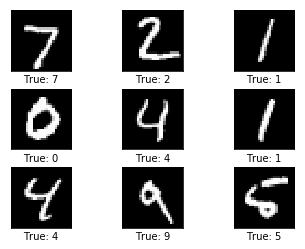

In [7]:
images = data.test.images [0 : 9]
cls_true = data.test.cls [0 : 9]
plot_images(images=images, cls_true=cls_true)

In [8]:
x = tf.placeholder(tf.float32, [None, args.img_size_flat])
y_true = tf.placeholder(tf.float32, [None, args.num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

In [9]:
weights = tf.Variable(tf.zeros([args.img_size_flat, args.num_classes]))
biases = tf.Variable(tf.zeros([args.num_classes]))

In [10]:
logit = tf.matmul(x, weights) + biases

In [11]:
y_pred = tf.nn.softmax(logit)

In [12]:
y_pred_cls = tf.argmax(y_pred, axis=1)

In [13]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y_true)

In [14]:
cost = tf.reduce_mean(cross_entropy)

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.3).minimize(cost)

In [16]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [17]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [19]:
batch_size = 100

In [20]:
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch = data.train.next_batch(batch_size=batch_size)
        feed_dict_train = {x: x_batch, y_true: y_true_batch}
        session.run(optimizer, feed_dict=feed_dict_train)

In [21]:
feed_dict_test = {x: data.test.images,
                 y_true: data.test.labels,
                 y_true_cls: data.test.cls}

In [22]:
def print_accuracy():
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    print('Accuracy on test=set: {0:.1%}'.format(acc))

In [23]:
print_accuracy()

Accuracy on test=set: 9.8%


In [24]:
%%time
optimize(num_iterations=10)
print_accuracy()

Accuracy on test=set: 76.9%
Wall time: 129 ms


In [25]:
%%time
optimize(num_iterations=990)
print_accuracy()

Accuracy on test=set: 91.8%
Wall time: 581 ms


In [26]:
def print_confusion_matrix():
    
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    
    cm = confusion_matrix(y_true=data.test.cls, y_pred=cls_pred)
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.BuPu)
    
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(args.num_classes)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()

[[ 965    0    2    2    0    3    5    1    2    0]
 [   0 1106    3    3    0    3    4    1   15    0]
 [   9    5  916   18   11    1   12   14   39    7]
 [   3    0   20  920    0   26    2   11   18   10]
 [   2    1    6    2  910    2   10    2    8   39]
 [  10    3    6   47    7  762   13    7   30    7]
 [  14    3    4    1   11   16  906    1    2    0]
 [   4    8   20   10    7    0    0  941    3   35]
 [   9    8    9   28    9   29   10   13  853    6]
 [  12    7    3   12   32   11    0   25    7  900]]


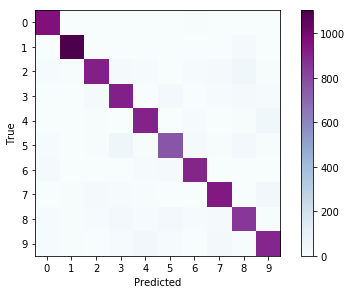

In [27]:
print_confusion_matrix()